# Mean lag visualizations
In order to identify modules of interest for shifted ATL gene expression, we'll plot the mean lag of ATL vs. the other varieties under short and long day.

In [1]:
from os import listdir
from os.path import abspath, splitext
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the data
For the moment, we only care about the lag of the modules, so we don't need files with the module membership. We also know we're primarily interested in the differences between ATL and the other two varieties, so we will ignore any file that doesn't include ATL.

In [2]:
def parse_module_filename(f):
    """
    Parse the filename into a tuple of the form
    (variety 1, variety 2, day length, tissue)
    """
    name_parts = splitext(f)[0].split('_')
    name_tup = (
        name_parts[0],
        name_parts[4],
        name_parts[1], # Assumes they're the same for both
        name_parts[2] # Also assumes they're the same for both
    )
    return name_tup

In [3]:
module_lag_dfs = {}
results_dir = '/home/farre/Ann/RNAseq/for_serena/module_results'
for f in listdir(results_dir):
    if 'averages_correlations' in f:
        # Parse the file name, keep just the comparison
        name_tup = parse_module_filename(f)
        # Skip non-ATL files
        if 'ATL' not in name_tup:
            continue
        # Read in the df
        df = pd.read_csv(abspath(f'{results_dir}/{f}'))
        # Assign to results dict
        module_lag_dfs[name_tup] = df

## Plot
First, let's define dictionaries for the various colors, shapes and shadings that we want to use. Colors and marker shapes will indicate the same facet of the data.

In [4]:
colors = {
    ('ATL', 'CND'): 'limegreen',
    ('ATL', 'M6'): 'violet'
}

markers = {
    ('ATL', 'CND'): 'triangle_up',
    ('ATL', 'M6'): 'square'
}

fill = {
    'LgD': 'use color',
    'ShD': 'none'
}

Next, we need to combine all the data and reshape it into long form so that we can plot it with separate legend sections for each facet of the data.

In [5]:
long_data_dict = {'module': [], 'comparison': [], 'day_len': [], 'mean_lag': [], 'lag_std': []}
for comp, df in module_lag_dfs.items():
    comparison_name = '_'.join(comp[:2])
    day_len = comp[2]
    for i, row in df.iterrows():
        long_data_dict['module'].append(int(row.module))
        long_data_dict['comparison'].append(comparison_name)
        long_data_dict['day_len'].append(day_len)
        long_data_dict['mean_lag'].append(row.mean_lag)
        long_data_dict['lag_std'].append(row.lag_std)
long_data_df = pd.DataFrame(long_data_dict).sort_values(by='module')
long_data_df = long_data_df.astype({'module': 'str'})
long_data_df.head()

,module,comparison,day_len,mean_lag,lag_std
0,0,ATL_CND,LgD,0.203785,1.684897
20,0,ATL_M6,LgD,0.530426,3.660260
52,0,ATL_M6,ShD,3.008584,2.787370
34,0,ATL_CND,ShD,5.792000,1.704860
35,1,ATL_CND,ShD,3.589242,3.601128


Now we define our plotting code:

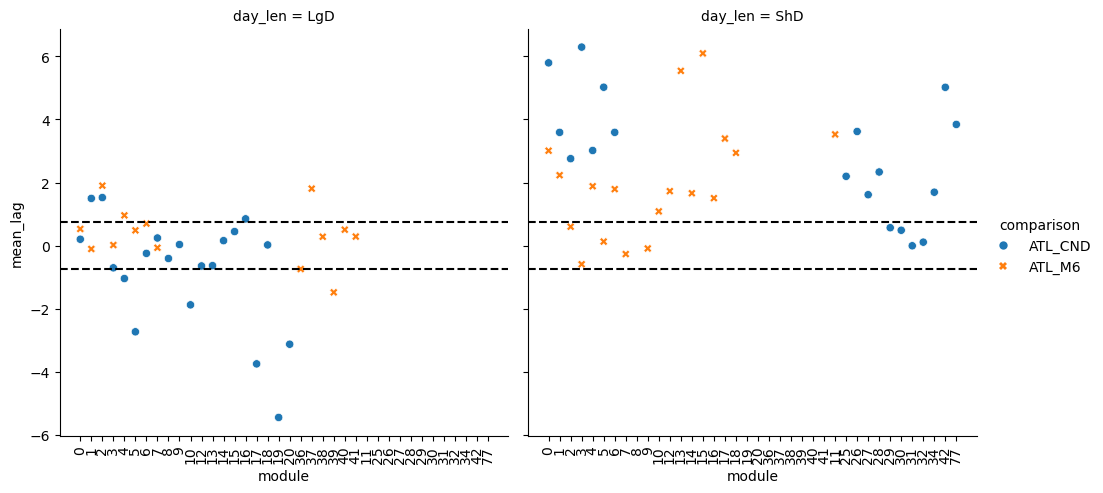

In [6]:
pl = sns.relplot(data=long_data_df, x='module', y='mean_lag', hue='comparison', style='comparison', col='day_len')
for ax in pl.axes.flat:
    ax.axhline(y=0.75, color='black', ls='--')
    ax.axhline(y=-0.75, color='black', ls='--')
    ax.tick_params(axis='x', rotation=90)

In general, we see that there is greater positive lag betwen ATL and the other varieties in short days, which we would expect to see.